# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Neural Network\gas_turbines.csv')
data.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [3]:
data.shape

(15039, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


There are no missing values

In [5]:
# checking for duplicates
data.duplicated().any()

False

There are no duplicates

# Visualizing Data

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'AT'),
  Text(1.5, 0, 'AP'),
  Text(2.5, 0, 'AH'),
  Text(3.5, 0, 'AFDP'),
  Text(4.5, 0, 'GTEP'),
  Text(5.5, 0, 'TIT'),
  Text(6.5, 0, 'TAT'),
  Text(7.5, 0, 'TEY'),
  Text(8.5, 0, 'CDP'),
  Text(9.5, 0, 'CO'),
  Text(10.5, 0, 'NOX')])

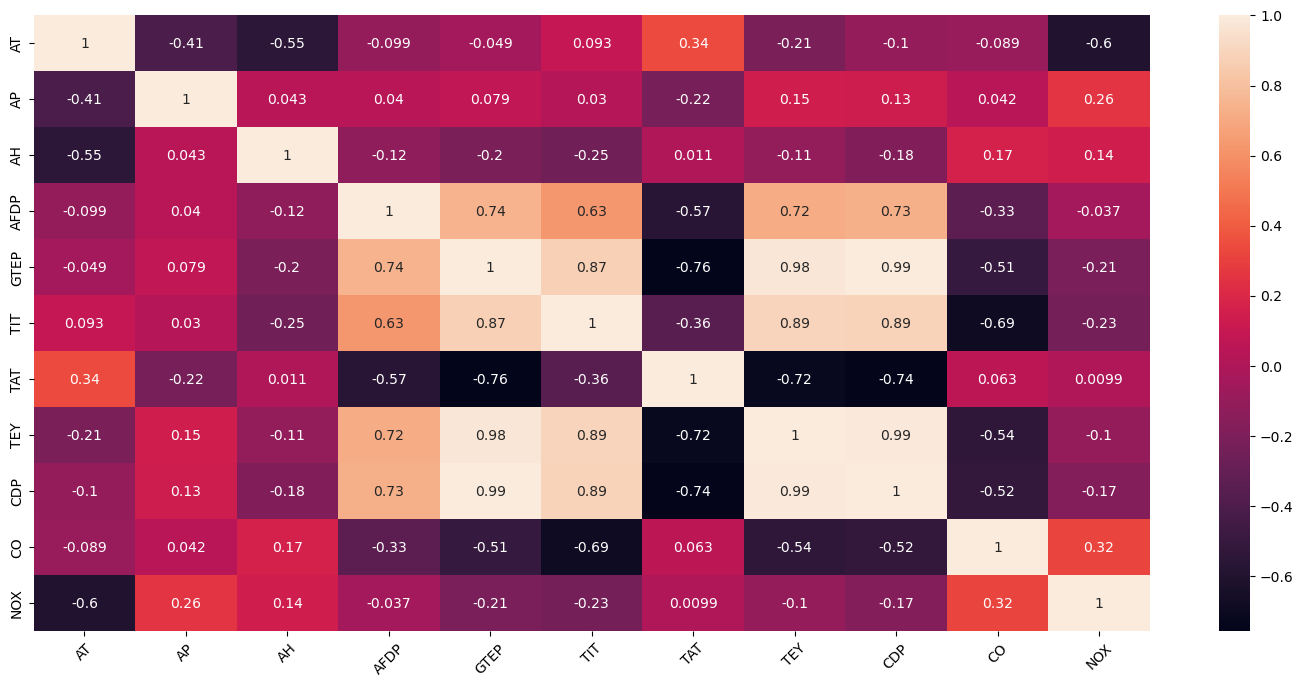

In [6]:
import seaborn as sns
fig= plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

# Data Pre-Processing

In [7]:
# checking columns
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:
# Splitting data into test data and train data
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
y= data['TEY']

In [9]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [10]:
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [11]:
# Standerdizing the independant variables
X_standerdized= (X-X.mean())/X.std()
X_standerdized

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153144,-1.185388,1.401813,-0.865821,-1.498607,-2.063115,0.103449,-1.543109,1.145754,1.085714
15035,-1.303943,-1.138592,1.447705,-0.913440,-1.438712,-2.268829,-0.276629,-1.513196,1.293535,1.119905
15036,-1.386220,-1.076197,1.476921,-0.951457,-1.410920,-2.789165,-1.026616,-1.467873,2.695835,2.169990
15037,-1.420375,-0.998203,1.441542,-0.988815,-1.447576,-2.456392,-0.528319,-1.422551,1.924619,2.391085


# Building a Sequential Model

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.svm import SV
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Building Regression Model

In [21]:
!pip install tensorflow scikit-learn

In [22]:
pip install --upgrade tensorflow scikit-learn

     ---------------------------------------- 9.3/9.3 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!pip install scikeras

#from scikeras.wrappers import KerasClassifier

!pip uninstall tensorflow
!pip install tensorflow==2.12.0

In [ ]:
# create regression model

from scikeras.wrappers import KerasRegressor

model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]

param_grid= dict(batch_size= batch_size, epochs=epochs)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X_standerdized,y)

In [ ]:
# results
grid_result= grid.fit(X_standerdized,y)

print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print('{},{} with: {}'.format(mean, stdev, param))

# Tuning : Learning rate and drop out rate

In [46]:
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Defining Regression Model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]

param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X_standerdized,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/15] END drop

[CV 3/5; 12/15] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=   0.0s
[CV 4/5; 12/15] START dropout_rate=0.2, learning_rate=0.01......................
[CV 4/5; 12/15] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=   0.0s
[CV 5/5; 12/15] START dropout_rate=0.2, learning_rate=0.01......................
[CV 5/5; 12/15] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=   0.0s
[CV 1/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 1/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 2/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 2/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 3/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 3/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 4/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.............

ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\4164885606.py", line 5, in create_model_lr_drate
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


In [48]:
#  result
grid_result= grid.fit(X_standerdized,y)

print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=nan total time=   0.0s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/15] END drop

[CV 1/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 2/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 2/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 3/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 3/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 4/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 4/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 5/5; 13/15] START dropout_rate=0.2, learning_rate=0.1.......................
[CV 5/5; 13/15] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   0.0s
[CV 1/5; 14/15] START dropout_rate=0.2, learning_rate=0.2.......................
[CV 1/5; 14/15] END dropout_rate=0.2, learning_rate=0.2;, score=nan total time=   0.0s
[CV 2/5; 14/15] START dropout_rate=0.2, learning_rate=0.2................

ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\4164885606.py", line 5, in create_model_lr_drate
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


# Tuning : Activation function and Kernal intitilizer

In [49]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']

param_grid= dict(activation_function= activation_function, init=init)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X_standerdized,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................
[CV 1/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 1/5; 2/6] START activation_function=linear, init=normal.....................
[CV 

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\255255626.py", line 2, in create_model_af_ker_ini
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


In [50]:
#  results

grid_result= grid.fit(X_standerdized,y)

print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................
[CV 1/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 1/5; 2/6] START activation_function=linear, init=normal.....................
[CV 

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\255255626.py", line 2, in create_model_af_ker_ini
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


# Tuning : Number of Neurons in activation layer

In [51]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X_standerdized,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 1/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END neuron1=4, neuron2=4, n

[CV 5/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=nan total time=   0.0s
[CV 1/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 1/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=nan total time=   0.0s
[CV 2/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 2/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=nan total time=   0.0s
[CV 3/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 3/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=nan total time=   0.0s
[CV 4/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 4/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=nan total time=   0.0s
[CV 5/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 5/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=nan total time=   0.0s
[CV 1/5; 13/27] START neuron1=8, neuron2=8, neuron3=4...........................
[CV 1/5; 13

[CV 2/5; 23/27] END neuron1=16, neuron2=8, neuron3=8;, score=nan total time=   0.0s
[CV 3/5; 23/27] START neuron1=16, neuron2=8, neuron3=8..........................
[CV 3/5; 23/27] END neuron1=16, neuron2=8, neuron3=8;, score=nan total time=   0.0s
[CV 4/5; 23/27] START neuron1=16, neuron2=8, neuron3=8..........................
[CV 4/5; 23/27] END neuron1=16, neuron2=8, neuron3=8;, score=nan total time=   0.0s
[CV 5/5; 23/27] START neuron1=16, neuron2=8, neuron3=8..........................
[CV 5/5; 23/27] END neuron1=16, neuron2=8, neuron3=8;, score=nan total time=   0.0s
[CV 1/5; 24/27] START neuron1=16, neuron2=8, neuron3=16.........................
[CV 1/5; 24/27] END neuron1=16, neuron2=8, neuron3=16;, score=nan total time=   0.0s
[CV 2/5; 24/27] START neuron1=16, neuron2=8, neuron3=16.........................
[CV 2/5; 24/27] END neuron1=16, neuron2=8, neuron3=16;, score=nan total time=   0.0s
[CV 3/5; 24/27] START neuron1=16, neuron2=8, neuron3=16.........................
[CV 3/5;

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\3673122104.py", line 2, in create_model_neuron
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


In [52]:
# summerize results

grid_result= grid.fit(X_standerdized,y)

print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 1/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=nan total time=   0.0s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END neuron1=4, neuron2=4, n

[CV 4/5; 15/27] END neuron1=8, neuron2=8, neuron3=16;, score=nan total time=   0.0s
[CV 5/5; 15/27] START neuron1=8, neuron2=8, neuron3=16..........................
[CV 5/5; 15/27] END neuron1=8, neuron2=8, neuron3=16;, score=nan total time=   0.0s
[CV 1/5; 16/27] START neuron1=8, neuron2=16, neuron3=4..........................
[CV 1/5; 16/27] END neuron1=8, neuron2=16, neuron3=4;, score=nan total time=   0.0s
[CV 2/5; 16/27] START neuron1=8, neuron2=16, neuron3=4..........................
[CV 2/5; 16/27] END neuron1=8, neuron2=16, neuron3=4;, score=nan total time=   0.0s
[CV 3/5; 16/27] START neuron1=8, neuron2=16, neuron3=4..........................
[CV 3/5; 16/27] END neuron1=8, neuron2=16, neuron3=4;, score=nan total time=   0.0s
[CV 4/5; 16/27] START neuron1=8, neuron2=16, neuron3=4..........................
[CV 4/5; 16/27] END neuron1=8, neuron2=16, neuron3=4;, score=nan total time=   0.0s
[CV 5/5; 16/27] START neuron1=8, neuron2=16, neuron3=4..........................
[CV 5/5; 1

[CV 3/5; 26/27] END neuron1=16, neuron2=16, neuron3=8;, score=nan total time=   0.0s
[CV 4/5; 26/27] START neuron1=16, neuron2=16, neuron3=8.........................
[CV 4/5; 26/27] END neuron1=16, neuron2=16, neuron3=8;, score=nan total time=   0.0s
[CV 5/5; 26/27] START neuron1=16, neuron2=16, neuron3=8.........................
[CV 5/5; 26/27] END neuron1=16, neuron2=16, neuron3=8;, score=nan total time=   0.0s
[CV 1/5; 27/27] START neuron1=16, neuron2=16, neuron3=16........................
[CV 1/5; 27/27] END neuron1=16, neuron2=16, neuron3=16;, score=nan total time=   0.0s
[CV 2/5; 27/27] START neuron1=16, neuron2=16, neuron3=16........................
[CV 2/5; 27/27] END neuron1=16, neuron2=16, neuron3=16;, score=nan total time=   0.0s
[CV 3/5; 27/27] START neuron1=16, neuron2=16, neuron3=16........................
[CV 3/5; 27/27] END neuron1=16, neuron2=16, neuron3=16;, score=nan total time=   0.0s
[CV 4/5; 27/27] START neuron1=16, neuron2=16, neuron3=16........................
[

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\mukes\AppData\Local\Temp\ipykernel_23316\3673122104.py", line 2, in create_model_neuron
    model= Sequential()
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\training.py", line 199, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 757, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\version_utils.py", line 49, in __new__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 556, in __getattr__
  File "C:\Users\mukes\anaconda3\lib\site-packages\keras\src\utils\generic_utils.py", line 547, in _load
  File "C:\Users\mukes\anaconda3\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'


# Model

In [ ]:
from sklearn.svm import SVR 
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=200)

# Create an instance of the model (replace SVR with your specific model)
model = SVR()

# Fit the model to the training data
estimator= model.fit(X_standerdized,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, X_standerdized,y, cv= kfold)
print('mse:', results.mean())

# Splitting into input (X) and output (y) variables

In [151]:
# Splitting data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [152]:
X_train.shape, X_test.shape

((356, 9), (153, 9))

In [162]:
# ! pip install tensorflow

In [182]:
from tensorflow import keras
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))       
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 2s 26ms/step - loss: 0.6837 - accuracy: 0.6807 - val_loss: 0.6595 - val_accuracy: 0.7797
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6552 - accuracy: 0.7017 - val_loss: 0.6223 - val_accuracy: 0.7797
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6323 - accuracy: 0.7017 - val_loss: 0.5942 - val_accuracy: 0.7797
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6187 - accuracy: 0.7059 - val_loss: 0.5733 - val_accuracy: 0.7797
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.5957 - accuracy: 0.7101 - val_loss: 0.5588 - val_accuracy: 0.7881
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 0.5655 - accuracy: 0.7815 - val_loss: 0.5364 - val_accuracy: 0.7966
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 0.5336 - accuracy: 0.7899 - val_loss: 0.5003 - val_accuracy: 0.8475
Epoch 

In [183]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9902
accuracy: 99.02%


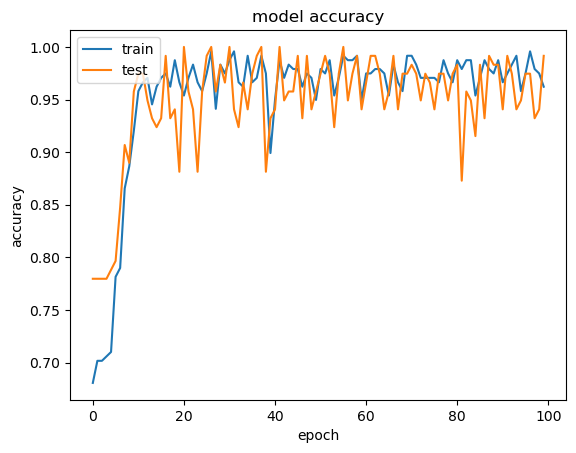

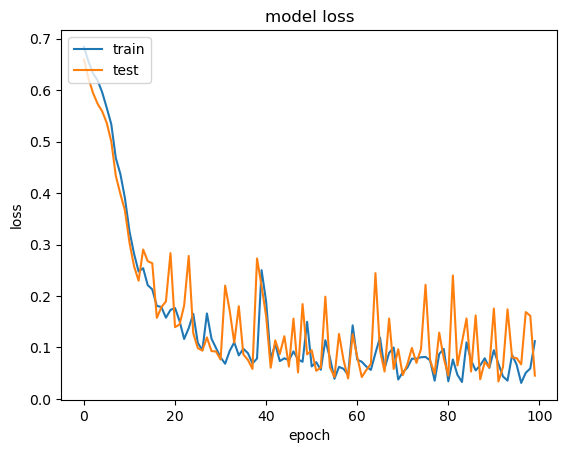

In [186]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
